In [ ]:
from google.colab import drive
drive.mount("/content/drive")

#https://www.youtube.com/watch?v=bNntsCOdFxg

Mounted at /content/drive


In [ ]:
train_file = "/content/drive/My Drive/Colab Notebooks/train.zip"

In [ ]:
train_file = "/content/drive/My Drive/train.zip"

#For alex to run :)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

with zipfile.ZipFile(train_file, 'r') as z:
  z.extractall()

0. Loading in the Data


In [ ]:
import os
import cv2

def load_image(file_path):
  return cv2.imread(file_path)

def extract_label(file_name):
  if "4G_LTE_Uplink" in file_name:
     return 0
  elif "4G_LTE_Downlink" in file_name: 
    return 1 
  elif "5G_Downlink" in file_name: 
    return 2
  elif "5G_Uplink" in file_name: 
    return 3
  elif "WLAN" in file_name:
    return 4
 
class_names = ["4G_LTE_Uplink", "4G_LTE_Downlink", "5G_Downlink","5G_Uplink","WLAN" ]
train_path = "./train/"
image_files = os.listdir(train_path)
train_images = [load_image(train_path + file) for file in image_files]
train_labels = [extract_label(file) for file in image_files]

1. Pre Process the Data

In [ ]:
# Pre process the image to make them the same size and convert the images to greyscale
def preprocess_image(img, side = 500): # This side size will change, -> not really important tho becuase all imagees are of the same size
  min_side = min(img.shape[0], img.shape[1])
  img = img[:min_side, :min_side]
  img = cv2.resize(img, (side,side))
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #return img / 255.0
  return img

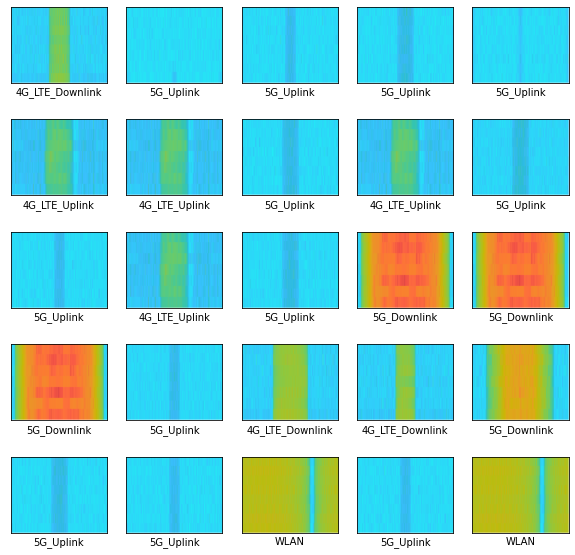

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#preview_index = 150
#plt.subplot(1,2,1)
#plt.imshow(train_images[preview_index])
#plt.subplot(1,2,2)
#plt.imshow(preprocess_image(train_images[preview_index]), cmap="gray")


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]-1])
plt.show()

In [ ]:
for i in range(len(train_images)):
  train_images[i]= preprocess_image(train_images[i])

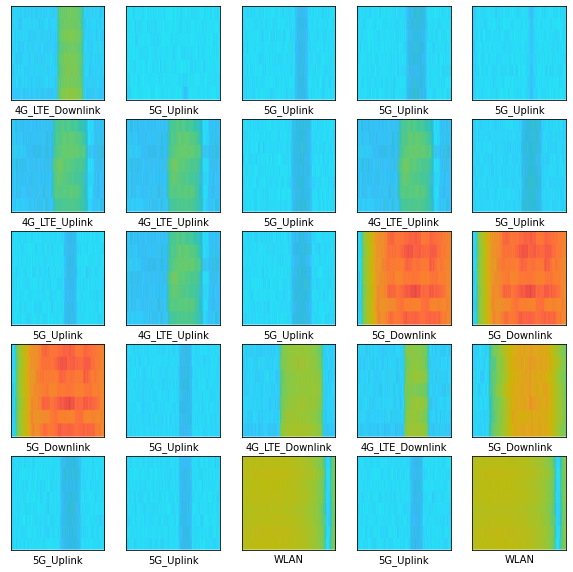

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]-1])
plt.show()

2. Flatten the Image for the convolutional Neural Network

In [ ]:
import numpy as np
#train_images = np.expand_dims(train_images, axis=-1)
train_images = np.array(train_images)
train_labels = np.array(train_labels)
print(train_images.shape, train_labels.shape)
#print(train_labels)

(2240, 500, 500, 3) (2240,)


3. Expanding to single channel for use in CNNs (V1)

In [ ]:
import tensorflow as tf
print("Tensorflow:", tf.__version__)
#tf.keras.layers.Flatten(input_shape=(500,500,1)),

layers = [
          tf.keras.layers.experimental.preprocessing.Rescaling(1*1, input_shape=(500,500,1)),
          tf.keras.layers.Conv2D(4, 1, padding='same', activation='relu'),
          tf.keras.layers.MaxPooling2D(),
          tf.keras.layers.Conv2D(32, 1, padding='same', activation='relu'),
          tf.keras.layers.MaxPooling2D(),
          tf.keras.layers.Conv2D(64, 1, padding='same', activation='relu'),
          tf.keras.layers.MaxPooling2D(),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(5)       
]

model = tf.keras.Sequential(layers)
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics = [tf.metrics.SparseCategoricalAccuracy()])
model.summary()

Tensorflow: 2.3.0
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 500, 500, 1)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 500, 500, 4)       8         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 250, 250, 4)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 250, 250, 32)      160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      2112      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 

4. Training the data

In [ ]:
# https://www.tensorflow.org/tutorials/images/cnn Another model to try
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(5))
model.summary()

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 498, 498, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 247, 247, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 123, 123, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 121, 121, 64)      36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 937024)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
model.fit(train_images, train_labels, epochs = 3)
model.save_weights("model.tf")
test_loss, test_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/3
70/70 [==============================] - 13s 185ms/step - loss: 229.9193 - accuracy: 0.8353
Epoch 2/3
70/70 [==============================] - 13s 188ms/step - loss: 2.8794e-05 - accuracy: 1.0000
Epoch 3/3
70/70 [==============================] - 13s 188ms/step - loss: 5.0350e-06 - accuracy: 1.0000
70/70 - 4s - loss: 4.0832e-06 - accuracy: 1.0000

Test accuracy: 1.0


5. Make Predictions

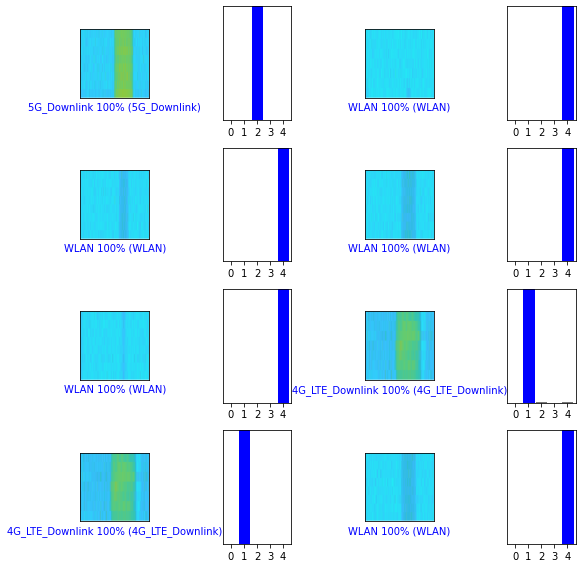

In [25]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

## Test images need to be new, currently only giving the training -> just need to get more signals genereated
test_images = train_images
test_labels = train_labels
# Give an array of unseen test values and make a prediction
predictions = probability_model.predict(train_images)

# Each image has a prediction -> prediction 1 is found at:
predictions[2]

## PLot them

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(5))
  plt.yticks([])
  thisplot = plt.bar(range(5), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 4
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


*** ONLY WORKS WITH ML MODEL 1 ***

In [ ]:
from google.colab import files
uploads = files.upload()

In [ ]:
eval_images = [preprocess_image(load_image(file)) for file in uploads.keys()]
eval_model = tf.keras.Sequential(layers)
eval_model.load_weights("model.tf")
eval_predictions = eval_model.predict(np.expand_dims(eval_images, axis=-1))


cols = 4
rows = np.ceil(len(eval_images)/cols)
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)
for i in range(len(eval_images)):
    print(eval_predictions[i])
    print(np.argmax(eval_predictions[i]))
    plt.subplot(rows, cols, i+1)
    plt.imshow(eval_images[i], cmap="gray")
    plt.title(class_names[np.argmax(eval_predictions[i])])
    plt.axis('off')

# ---> Not sure what is going on but sometimes it works well, other times it doesnt

NameError: ignored